In [4]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import scipy.stats as st
import seaborn as sns
from turtle import color


In [13]:
df = pd.read_csv("./uk_universities.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   University_name                                131 non-null    object 
 1   Region                                         131 non-null    object 
 2   Founded_year                                   131 non-null    int64  
 3   Motto                                          114 non-null    object 
 4   UK_rank                                        131 non-null    int64  
 5   World_rank                                     131 non-null    int64  
 6   CWUR_score                                     84 non-null     float64
 7   Minimum_IELTS_score                            131 non-null    float64
 8   UG_average_fees_(in_pounds)                    131 non-null    int64  
 9   PG_average_fees_(in_pounds)                    131 non

In [7]:
df50 = df.drop(["Longitude", "Latitude", "Estimated_cost_of_living_per_year_(in_pounds)", "PG_average_fees_(in_pounds)"], axis = 1)

En el siguiente mapa de calor podemos ver: 
1. Factores vinculados a la calidad de la universidad:
    1. Hay una correlación positiva entre la puntuación mundial y el precio de la universidad; parece que cuanto mejor es la puntuación, más cara será la universidad. 
    2. Esta puntuación también está vinculada con el nivel mínimo de inglés que se exige para entrar (Minimum_IELTS_score), así que parece lógico pensar que cuanto mayor es el nivel de competencias lingüísticas exigido, más calidad se le reconoce a la universidad. 
    3. Este nivel de inglés exigido también está vinculado al precio, lo que vendría a confirmar nuestra suposición del punto 1.1

2. Factores vinculados al ranking el Reino Unido:
    1. Curiosamente es la puntuación mundial y no la de UK la que parece afectar más a la posición de la universidad en UK.
    2. El nivel mínimo de inglés exigido también parece tener cierta relación con la posición en el ranking, apoyando la suposición del punto 1.2
    3. El precio también aumenta ligeramente con el ranking, pero quizá no tanto como cabría esperar, siendo mucho más relevante para las tarifas lo observado en el punto 1.1


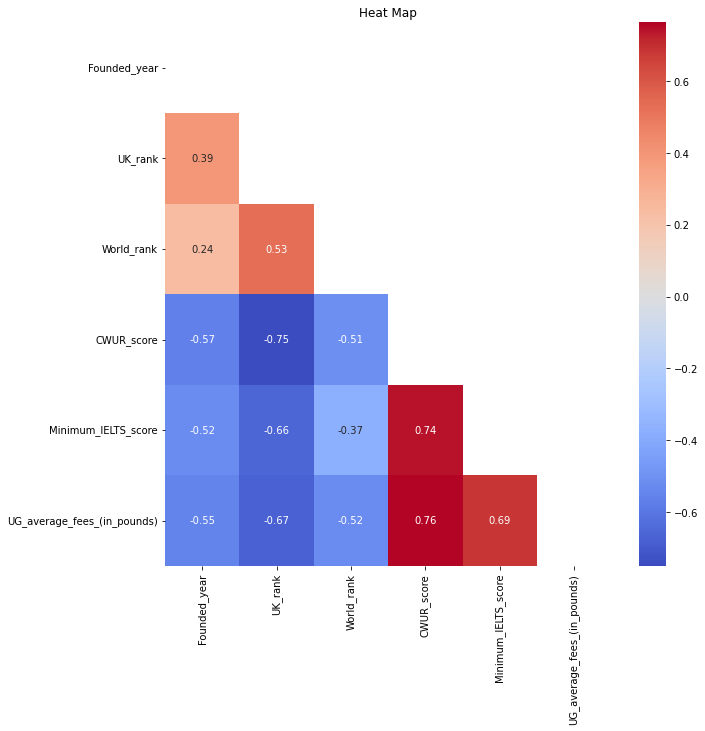

In [8]:
# Generamos una "mascara" que convierte nuestro df en un array de forma triangular de unos, luego lo usa cómo máscara para que la visualización nos salga con esa forma, más clara. 
mask = np.triu(np.ones_like(df50.corr(), dtype = bool))

plt.figure(figsize = (10,10))

sns.heatmap(df50.corr(), mask = mask,annot = True, cmap = "coolwarm")

plt.title('Heat Map')
plt.show()

In [16]:
# Para castear las variables de porcentajes, pasamos esta función y creamos columnas nuevas 

def convertir(x):
    x = float(x.replace("%", ""))
    return x

In [17]:
df70 = df.copy()

In [18]:
df70["Porcentaje_sat"] = df70["Student_satisfaction"].apply(convertir)
df70["Porcentaje_est_int"] = df70["International_students"].apply(convertir)


In [19]:
df75 = pd.DataFrame(df70.groupby("Region")["Porcentaje_est_int"].mean().sort_values(ascending=False))
df75 = df75.sort_values("Porcentaje_est_int").reset_index()
df75


,Region,Porcentaje_est_int
0,Northern Ireland,8.450000
1,North West England,11.581818
2,South West England,11.682500
3,Yorkshire and the Humber,11.962727
4,North East England,13.350000
5,East of England,13.909000
6,East Midlands,13.914286
7,Wales,14.521111
8,West Midlands,14.908000
9,South East England,17.429412


Como cabe suponer, el mayor número de estudiantes extranjeros está en Londres, que es también la región que tiene más universidades. Los siguientes dos histogramas nos muestran el número de universidades por región y el porcentaje de estudiantes extranjeros en cada región.

In [20]:
df76 = df.groupby("Region")["University_name"].count()
df76 = df76.reset_index().sort_values("University_name")
df76

,Region,University_name
5,Northern Ireland,2
3,North East England,6
0,East Midlands,7
9,Wales,9
1,East of England,10
10,West Midlands,10
4,North West England,11
11,Yorkshire and the Humber,11
8,South West England,12
6,Scotland,14


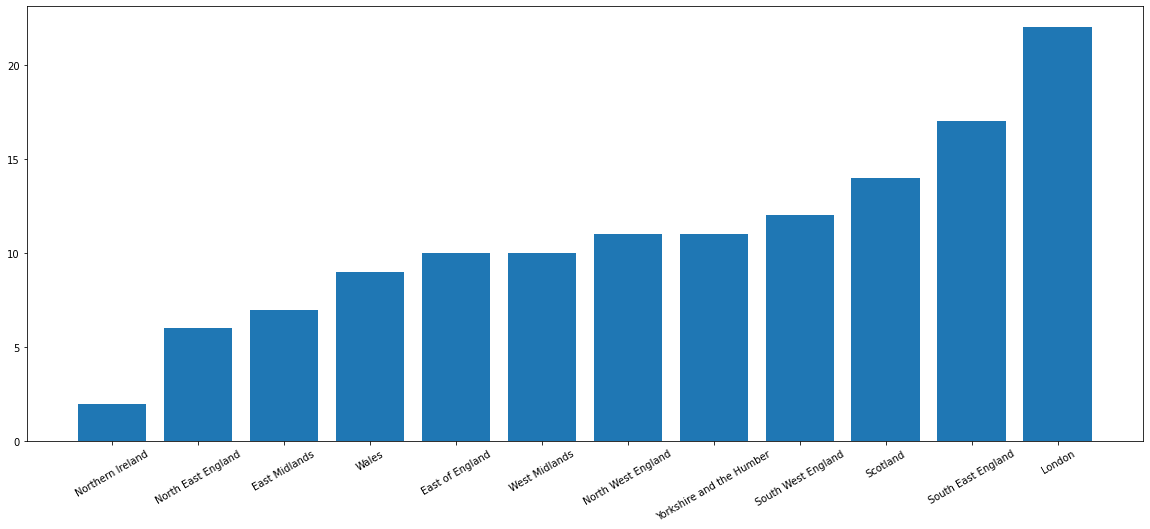

In [21]:
plt.figure(figsize=(20,8))
plt.bar(df76["Region"], df76["University_name"])
plt.xticks(rotation=30)
plt.show;

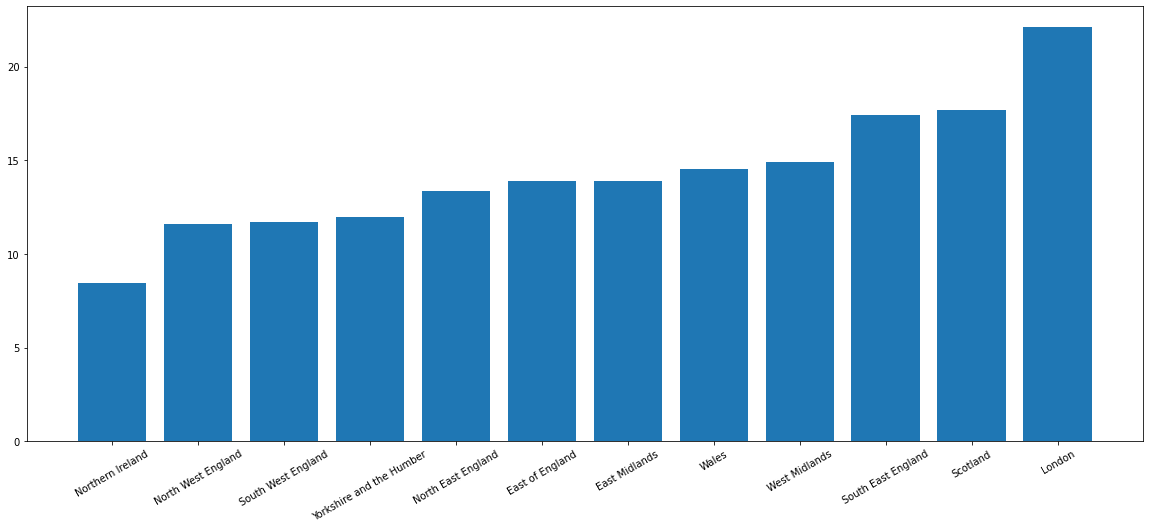

In [22]:
plt.figure(figsize=(20,8))
plt.bar(df75["Region"], df75["Porcentaje_est_int"])
plt.xticks(rotation=30)
plt.show;


1. Queremos saber cómo es la distribución de las universidades por regiones en función de su ubicación (con respecto al centro urbano)


In [139]:
df80 = df.groupby("Campus_setting").count().reset_index()
df80

,Campus_setting,University_name,Region,Founded_year,Motto,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),...,International_students,Student_satisfaction,Student_enrollment,Academic_staff,Control_type,Academic_Calender,Estimated_cost_of_living_per_year_(in_pounds),Latitude,Longitude,Website
0,Rural,8,8,8,6,8,8,2,8,8,...,8,8,8,8,8,6,8,8,8,8
1,Suburban,37,37,37,36,37,37,23,37,37,...,37,37,37,37,37,32,37,37,37,37
2,Urban,68,68,68,60,68,68,49,68,68,...,68,68,68,68,68,58,68,68,68,68


In [164]:
# Aqui podemos ver la media de precio de las universidades por ubicación
df81 = df.groupby("Campus_setting")["UG_average_fees_(in_pounds)"].mean().round(2)
df81 = df81.reset_index()
df81

,Campus_setting,UG_average_fees_(in_pounds)
0,Rural,11943.75
1,Suburban,12504.19
2,Urban,12817.29


El precio de las universidades aumenta según nos vamos acercando al nucleo urbano, siendo notablemente más bajo en el rural.

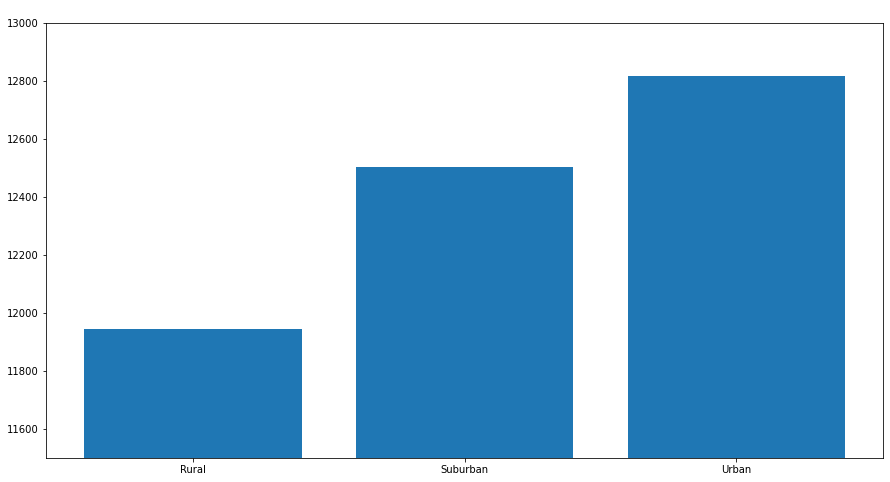

In [241]:
fig, ax = plt.subplots(1,figsize= (15,8))

plt.bar(df81["Campus_setting"], df81["UG_average_fees_(in_pounds)"],)
plt.title('Media de precio de universidades por ubicación', color = "w")
plt.ylim(11500,13000)


plt.show()

In [167]:
# Aquí podemos ver la media de precio de las universidades por región.
df82 = df.groupby("Region")["UG_average_fees_(in_pounds)"].mean().round(2)
df82 = df82.reset_index().sort_values("UG_average_fees_(in_pounds)")

df82

,Region,UG_average_fees_(in_pounds)
9,Wales,11161.11
3,North East England,11555.00
4,North West England,12003.18
10,West Midlands,12206.60
11,Yorkshire and the Humber,12230.91
8,South West England,12337.50
1,East of England,12449.50
6,Scotland,12571.57
0,East Midlands,12864.71
5,Northern Ireland,12887.50


El precio medio de las universidades es más alto en Londres, la ciudad en la que hay más, pero este patrón no se repite en otras regiones. Es probable que el precio esté vinculado al coste de vida en cada una de las regiones, pero no tenemos datos para comprobarlo.

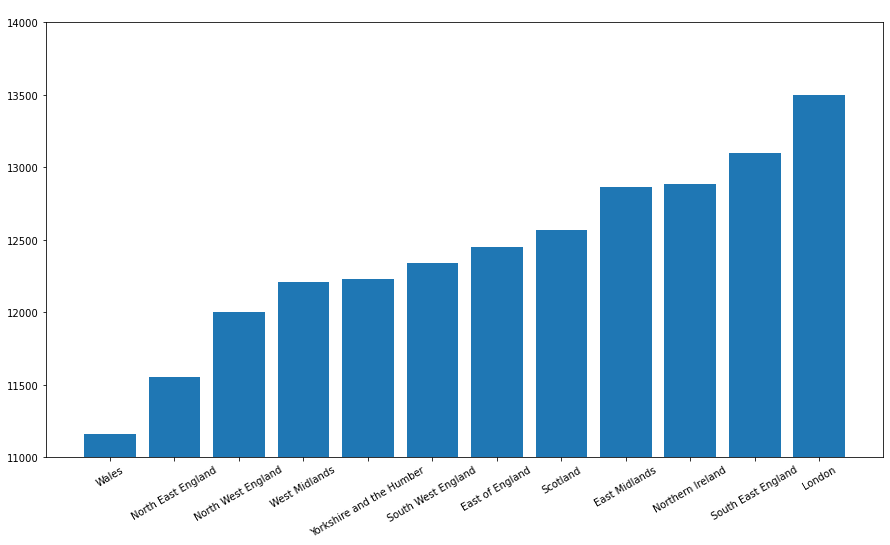

In [240]:
fig, ax = plt.subplots(1,figsize= (15,8))

plt.bar(df82["Region"], df82["UG_average_fees_(in_pounds)"],)
plt.title('Media de precio de universidades por ubicación', color = "w")
plt.ylim(11000,14000)
plt.xticks(rotation=30)

plt.show()

En el siguiente diagrama podemos ver claramente que la mayoría de universidades se encuentran en núcleos urbanos

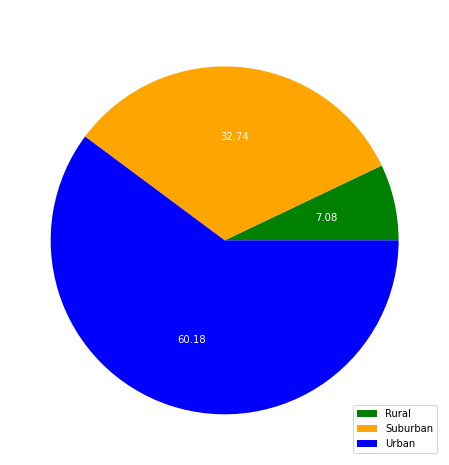

In [133]:
# Mostramos un Pie char con el total de las universidades de uk y sus porcentajes según su ubicación
fig, ax = plt.subplots(1,figsize= (15,8))

plt.pie(df80["University_name"], colors = ["g","orange","b"], textprops=dict(color="w"), autopct = '%.2f')
plt.title('Distribución de universidades por ubicación en UK', color = "w")
plt.legend(df80["Campus_setting"].unique(), loc = 4)

plt.show()

Y pese a lo que acabamos de constatar, si observamos la distribución en función de su ubicación en las distintas regiones de UK, vemos que el núcleo urbano no es dominante en todas las regiones, aunque destaca en Londres, que es la que aporta más centros educativos.

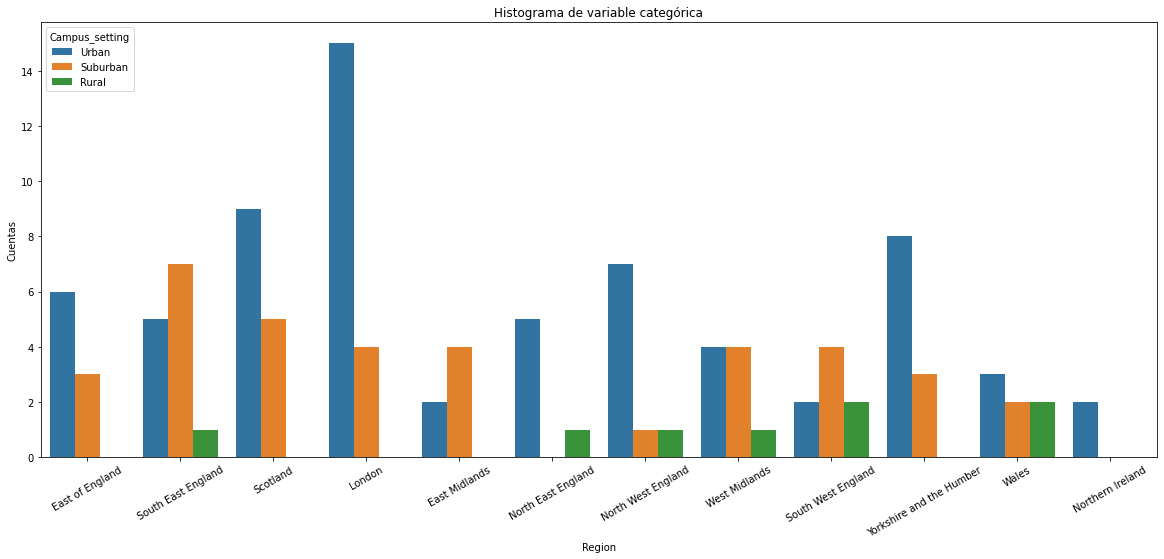

In [23]:
plt.figure(figsize =(20,8))
fig = sns.countplot(x='Region', data = df70, hue = 'Campus_setting')
fig.set(xlabel='Region', ylabel= 'Cuentas' )
fig.set_title('Histograma de variable categórica')
plt.xticks(rotation=30)
plt.show()

# Conclusiones finales
- El precio depende en gran medida de la puntuación mundial y ambos están relacionados coon el nivel de inglés mínimo exgido.
- El precio sube según nos vamos acercandoa al nucleo urbano.
- La región con las universidades más caras es Londres. Puede que esto esté vinculado al coste de vida en cada región, pero no tenemos datos para confirmarlo.
- Para la posición en el ranking de UK parece más relevante la puntuación mundial que la de UK.
- Londres es la región con más universidades y más estudiantes extanjeros.
- Aunque más de la mitad de las universidades están en núcleo urbano, no es la ubicación dominante en todas las regiones, en 4 de 12 destaca suburbano. Pero en Londres, la región que más centros educativos aporta, las ubicadas en núcleo urbano suponen una abrumadora mayoría
